## Exercise: compute the trend of a time series 

In this notebook you're going to perform a linear regression on time series data by exploiting *PyOphidia*, *numpy* and *matplotlib* for the visualization. The goal is to extract the trend of the time series. Also in this cases some of the code/arguments are missing and have to be properly completed.

Some hints to implement this analysis:

1. you can adapt on the code from the previous example to import data;
2. extract a single time series point, such as the first *latitude* and *longitude* before running the regression function;
3. in order to get the time series trend you can use the *apply* operator (take a moment to look a the documentation http://ophidia.cmcc.it/documentation/users/operators/OPH_APPLY.html) with the *oph_gsl_fit_linear* primitive (again check the documentation: http://ophidia.cmcc.it/documentation/users/primitives/OPH_GSL_FIT_LINEAR_COEFF.html).

```python
mycube.apply(query="oph_gsl_fit_linear_coeff('OPH_FLOAT','OPH_FLOAT',measure, dimension,...)")
```

The last argument of the primitives defines the information to be computed by the primitive. Set it based upon the analysis requirements.

Let's start

## 1. Run the analytics operators

1- First of all import the PyOphidia modules and connect to the server-side (as done in the previous notebooks)

In [1]:
#PLACE THE CODE HERE
from PyOphidia import cube
cube.Cube.setclient(read_env=True)

Current cdd is /
Current session is http://127.0.0.1/ophidia/sessions/101108125211146960091631883294618976/experiment
Current cwd is /
The last produced cube is http://127.0.0.1/ophidia/1/4


2- Load the *tasmin* variable from the input dataset located at ```/home/ophidia/notebooks/tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc```. Make sure to import the data so that it is time-array oriented.

**HINT**: To get an idea of the input dataset structure, dimension and metadata run the following command

In [2]:
cube.Cube.explorenc(src_path='/home/ophidia/notebooks/tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc')

Dimension list
--------------
+===========+======+===========+
| DIMENSION | SIZE | UNLIMITED |
|           |      |           |
+===========+======+===========+
| time      | 1826 | yes       |
|-----------|------|-----------|
| lat       | 48   | no        |
|-----------|------|-----------|
| lon       | 96   | no        |
|-----------|------|-----------|
| bnds      | 2    | no        |
+===========+======+===========+
Variable list
-------------
+===========+========+==============+
| VARIABLE  | TYPE   | DIMENSIONS   |
+===========+========+==============+
| time      | double | time         |
|-----------|--------|--------------|
| time_bnds | double | time|bnds    |
|-----------|--------|--------------|
| lat       | double | lat          |
|-----------|--------|--------------|
| lat_bnds  | double | lat|bnds     |
|-----------|--------|--------------|
| lon       | double | lon          |
|-----------|--------|--------------|
| lon_bnds  | double | lon|bnds     |
|-----------|-

|   | t |   |                                                                                                                                                                           |
|---|---|---|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   | i | t | CMCC                                                                                                                                                                      |
|   | n | e |                                                                                                                                                                           |
|   | s | x |                                                                                                                                                                           |
|   | t | t |                                                         

|   | a | e |                                                                                                                                                                           |
|   | b | x |                                                                                                                                                                           |
|   | l | t |                                                                                                                                                                           |
|   | e |   |                                                                                                                                                                           |
|---|---|---|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   | t | t | CMCC-CESM model output prepared for CMIP5 RCP8.5        

In [3]:
#COMPLETE THE IMPORT CODE
mintemp = cube.Cube.importnc(
    src_path='/home/ophidia/notebooks/tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc',
    measure='tasmin',
    imp_dim='time',
    description='Min Temps'
)

3- Extract a single time series from the imported cube *(just consider the first index for latitute and longitude)* and try to print its content

In [4]:
#COMPLETE THE SUBSET CODE
singleTS = mintemp.subset(
    subset_dims="lat|lon",
    subset_filter="1|1",
    subset_type='index'
)

singleTS.explore()

tasmin
------
+============+==========+===============================================================================================================================================================+
| lat        | lon      | tasmin                                                                                                                                                        |
+============+==========+===============================================================================================================================================================+
| -87.159095 | 0.000000 | 255.3484649658, 256.5523071289, 257.9611206055, 258.1882934570, 258.6824951172, 258.7531738281, 259.7331542969, 259.6237487793, 257.0916748047, 255.584564209 |
|            |          | 0, 256.6911926270, 257.7592773438, 256.3059692383, 255.1929779053, 254.8903198242, 254.4397430420, 254.0504760742, 255.5076904297, 257.9510498047, 256.182373 |
|            |          | 0469, 255.6322479248, 255.7233

4- Run the Ophidia primitive to perform the linear regression over the time series.

**NOTE:** try to compute the intercept and slope. The intercept will provide an idea of the trend (positive, negative or zero trend).

In [8]:
#COMPLETE THE APPLY OPERATOR CODE
trendCube = singleTS.apply(
    query="oph_gsl_fit_linear_coeff('OPH_FLOAT','OPH_FLOAT',measure, dimension,'110000')",
    check_type='no')

## 2. Display results

5- Try to plot the data with respect to the time dimensions (indexes), as well as the linear regression line (based on the slope and intercept computed with Ophidia) in a scatter plot. A skeleton of the plotting code is available in the cell.

**HINT:** The dependent variable is the output temperature, the independent variable is the time dimension (daily indexes). 

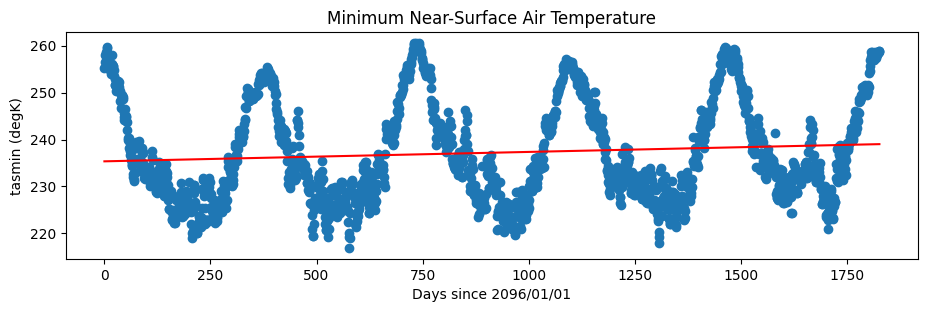

In [9]:
#COMPLETE THE CODE HERE
%matplotlib inline
#data from the single time series
data = singleTS.export_array(show_time='no')
#data from the regression function
trendCoeff = trendCube.export_array(show_time='no')


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np

y = data['measure'][0]['values'][0][:]
x = data['dimension'][2]['values'][:]
fig, ax = plt.subplots(figsize=(11, 3), dpi=100)
ax.scatter(x, y)

intercept = trendCoeff['measure'][0]['values'][0][0]
slope = trendCoeff['measure'][0]['values'][0][1]

line = intercept + slope * np.array(x)
ax.plot(x,line, color='red')

plt.ylabel(data['measure'][0]['name'] + " (degK)")
plt.xlabel("Days since 2096/01/01")
plt.title('Minimum Near-Surface Air Temperature')
plt.show()

## 3. Final remarks

**NOTE:** You can find a sample implementation of this exercise in the *Examples* folder in the notebook [**Linear_regression_example**](../Examples/Linear_regression.ipynb)

Finally clear your workspace from the datacubes produced during the experiments.

In [10]:
cube.Cube.deletecontainer(container='tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc',force='yes')

You have now completed the full set of hands-on notebooks! If you are insterested in more examples you check the [**Examples**](../Examples/) folder.